In [2]:
import os
current = os.getcwd()
print('현재경로:', current)

new = 'd:/study/python'
os.chdir(new)
print('변경경로:', new)

현재경로: d:\study\python\project\(추세선)연평균 증가율 이미지
변경경로: d:/study/python


In [3]:
import pandas as pd
import numpy as np

rd = pd.read_csv('src/rawdata.csv', encoding='cp949')

rd.head()

C:\Users\human\AppData\Local\Temp\ipykernel_7748\2234196475.py:4: DtypeWarning: Columns (7,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  rd = pd.read_csv('src/rawdata.csv', encoding='cp949')


,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2024,11500,강서구,10900,방화동,1,대지,614,11,원미,...,58000,63.060,0.0,4,NaN,NaN,1988.0,아파트,중개거래,경북 경산시
1,2024,11440,마포구,11000,노고산동,1,대지,107,36,현대벤처빌,...,22000,27.900,0.0,16,NaN,NaN,2002.0,아파트,중개거래,서울 마포구
2,2024,11350,노원구,10300,공릉동,1,대지,743,0,공릉동한보에센시티아파트,...,51500,59.400,0.0,10,NaN,NaN,2000.0,아파트,중개거래,서울 노원구
3,2024,11530,구로구,10200,구로동,1,대지,103,6,구로오네뜨시티,...,15000,16.710,0.0,13,NaN,NaN,2022.0,아파트,직거래,NaN
4,2024,11110,종로구,17500,숭인동,1,대지,766,0,종로청계힐스테이트,...,105000,84.947,0.0,18,NaN,20240514.0,2009.0,아파트,중개거래,서울 종로구


In [4]:
rd_price_mean = rd.groupby(['자치구명', '접수연도'])['물건금액(만원)'].mean()
print(rd_price_mean)

자치구명  접수연도
강남구   2017    125527.938857
      2018    153023.468684
      2019    179367.472522
      2020    183355.695412
      2021    207629.926495
                  ...      
중랑구   2020     50484.885705
      2021     64318.963308
      2022     49640.805604
      2023     57045.299154
      2024     58175.150901
Name: 물건금액(만원), Length: 200, dtype: float64


In [5]:
# 자치구별로 연평균 증가율을 저장할 빈 리스트 생성
cagr_results = []

# 각 자치구별로 연평균 증가율을 계산
for gu in rd_price_mean.index.levels[0]:
    gu_data = rd_price_mean.loc[gu]  # 특정 자치구의 데이터만 선택
    
    # 연평균 증가율을 계산하기 위해 데이터 정렬
    gu_data_sorted = gu_data.sort_index()

    # 연평균 증가율 계산
    start_price = gu_data_sorted.iloc[0]  # 시작 연도의 매매가
    end_price = gu_data_sorted.iloc[-1]   # 마지막 연도의 매매가
    periods = len(gu_data_sorted) - 1     # 총 기간에서 1을 뺀 것이 증가율을 구할 때 사용할 연도 개수

    cagr = ((end_price / start_price) ** (1 / periods)) - 1  # CAGR 공식을 사용하여 연평균 증가율 계산
    cagr_percent = round(cagr * 100, 2)  # 소수점 이하 2자리까지 반올림하고 퍼센트로 변환

    # 결과를 리스트에 추가
    cagr_results.append({'자치구명': gu, 'CAGR': f'{cagr_percent}%'})

# 결과를 DataFrame으로 변환
cagr_df = pd.DataFrame(cagr_results)

print(cagr_df)

    자치구명    CAGR
0    강남구   9.41%
1    강동구   9.02%
2    강북구   6.82%
3    강서구   7.35%
4    관악구   7.85%
5    광진구    9.1%
6    구로구   7.46%
7    금천구   7.99%
8    노원구   8.23%
9    도봉구   6.94%
10  동대문구   7.73%
11   동작구   7.68%
12   마포구   8.92%
13  서대문구   7.99%
14   서초구  10.07%
15   성동구  10.12%
16   성북구   7.41%
17   송파구   9.53%
18   양천구   8.24%
19  영등포구    9.4%
20   용산구  11.94%
21   은평구   7.22%
22   종로구   8.83%
23    중구   7.05%
24   중랑구   7.36%


In [6]:
pip install seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


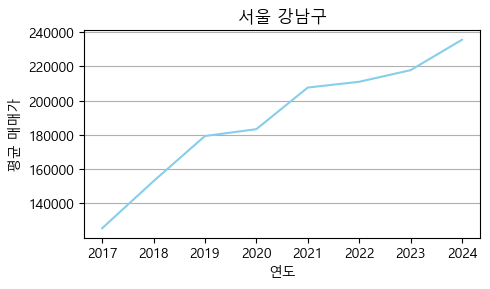

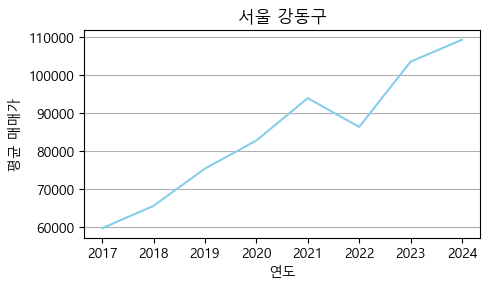

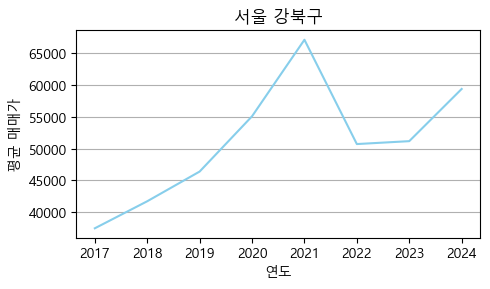

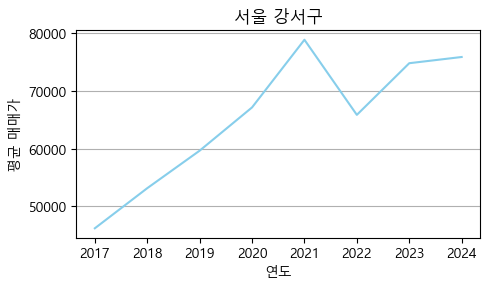

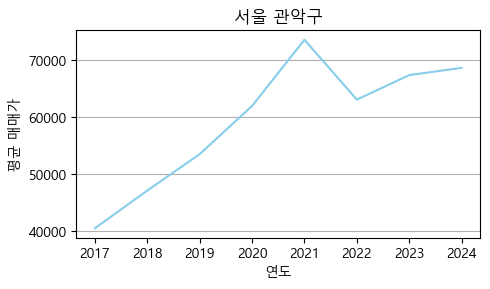

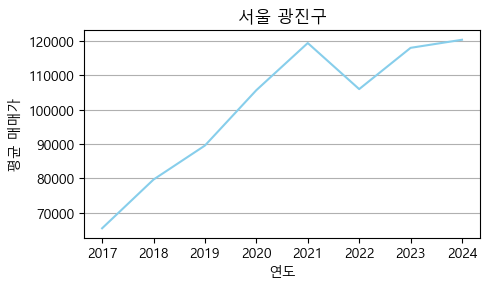

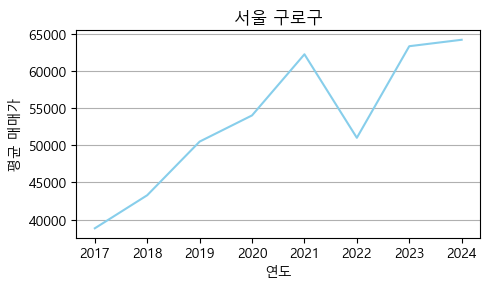

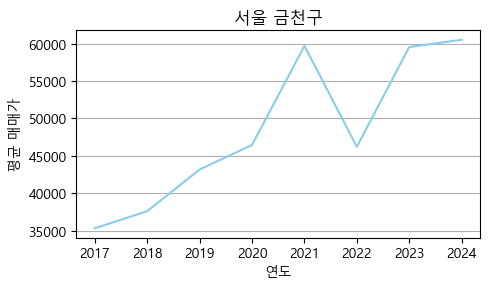

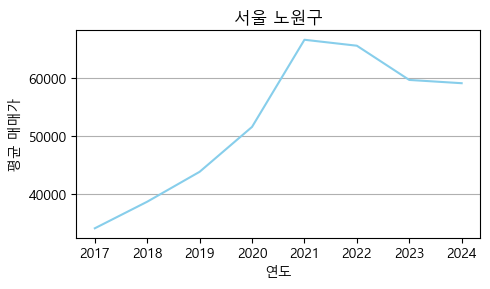

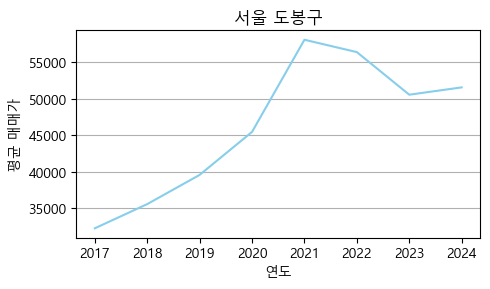

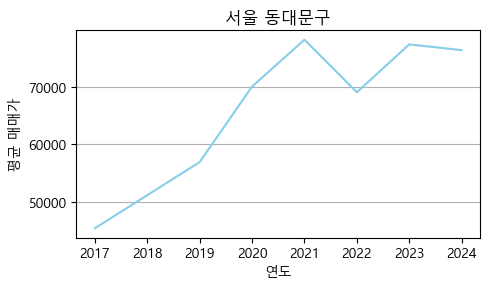

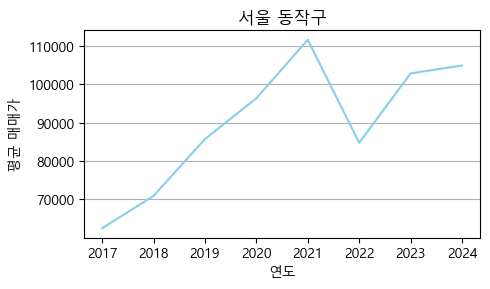

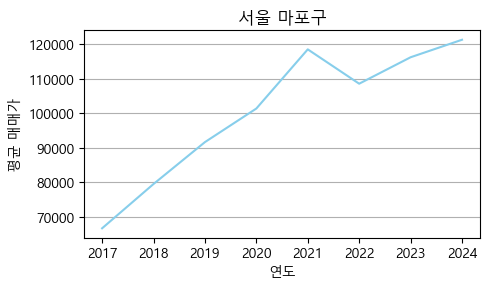

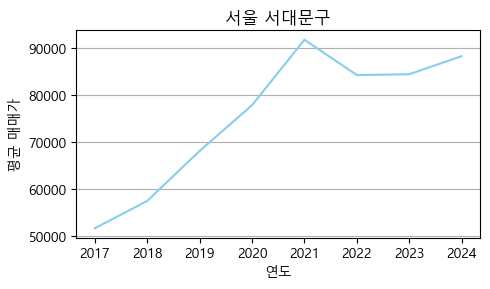

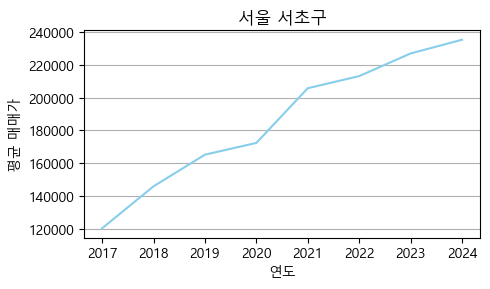

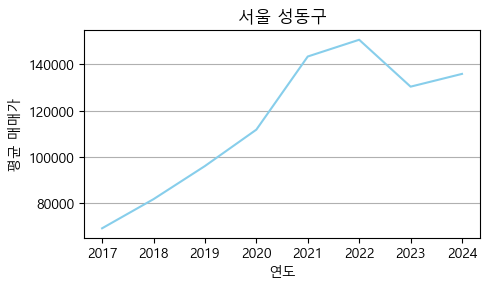

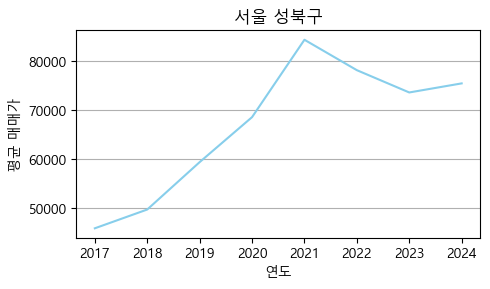

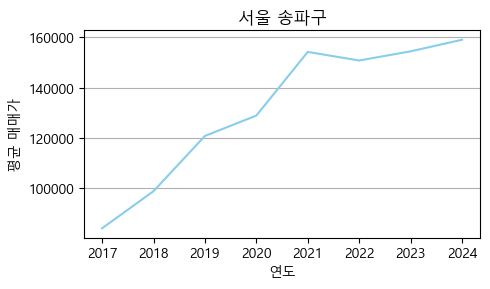

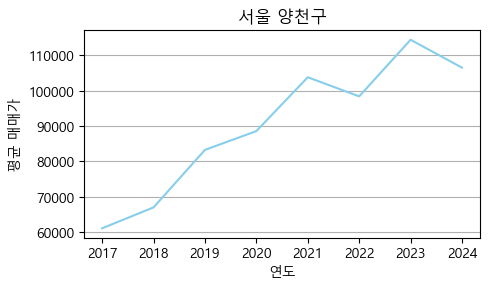

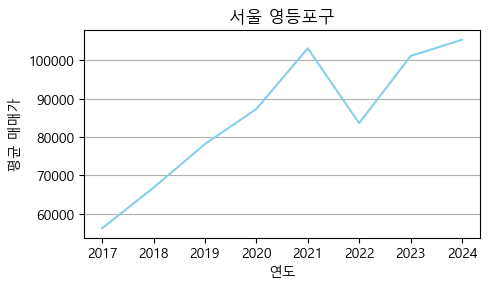

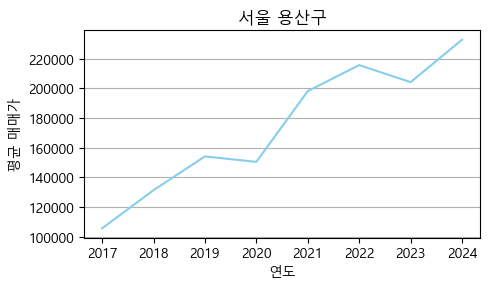

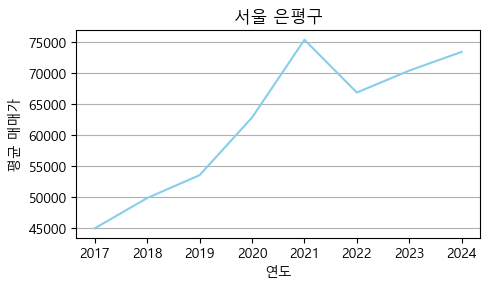

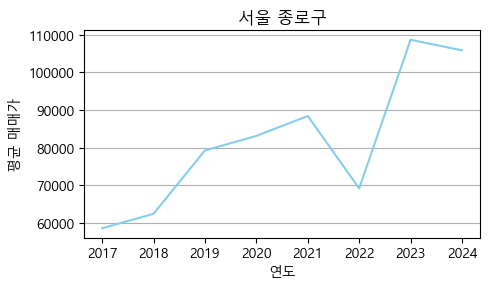

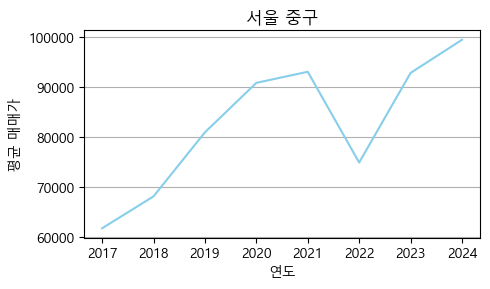

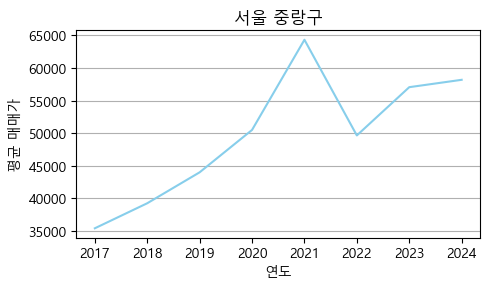

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 각 자치구명 별로 개별적인 그래프 그리기
for gu in rd_price_mean.index.levels[0]:
    gu_data = rd_price_mean.loc[gu]  # 특정 자치구의 데이터만 선택
    
    # 그래프 그리기
    plt.figure(figsize=(5, 3))  # 그래프의 크기 설정
    plt.plot(gu_data.index, gu_data.values, color='skyblue')  # 그래프 생성
    plt.xlabel('연도')  # x축 라벨 설정
    plt.ylabel('평균 매매가')  # y축 라벨 설정
    plt.title(f'서울 {gu}')  # 그래프 제목 설정
    plt.grid(axis='y')  # y축에 대해서만 그리드 표시
    plt.tight_layout()  # 그래프 여백 조정
    plt.savefig(f'{gu}_연평균증가율 그래프(연도별 평균매매가).png') #그래프 저장
    plt.show()  # 그래프 출력
